In [1]:
import stream as st
st.__version__

/opt/conda/lib/python3.7/site-packages/anndata/core/anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/opt/conda/lib/python3.7/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


'1.0'

In [2]:
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

In [3]:
%pwd

'/data/trajectory_reconstruction'

In [4]:
%ls ../synthetic_data/

_tests/
branching_synthetic_core_regulation1_2022-04-11_14h33m15.tsv
branching_synthetic_core_regulation2_2022-04-11_14h57m51.tsv
branching_synthetic_hematopoiesis_2022-03-15_14h51m06.tsv
metadata_core_regulation1_2022-04-11_14h33m15.tsv
metadata_core_regulation2_2022-04-11_14h57m51.tsv
metadata_hematopoiesis_2022-03-15_14h51m06.tsv
metadata_star.tsv
synthetic_star.tsv


#### Read in data

In [5]:
adata=st.read(file_name='../synthetic_data/synthetic_star.tsv',workdir='./stream_result')

Saving results in: ./stream_result


> **To load and use 10x Genomics single cell RNA-seq data processed with Cell Ranger:**   
(*The variable index can be reset by choosing a different column in `gene.tsv`*)
```python
adata=st.read(file_name='./filtered_gene_bc_matrices/matrix.mtx',
              file_feature='./filtered_gene_bc_matrices/genes.tsv',
              file_sample='./filtered_gene_bc_matrices/barcodes.tsv',
              file_format='mtx',workdir='./stream_result')    
adata.var.index = adata.var[1].values   
```

> **If the Anndata object is already created, to run STREAM, please simply specify work directory:**
```python
st.set_workdir(adata,'./stream_result')
```

In [6]:
adata

AnnData object with n_obs × n_vars = 3300 × 11 
    uns: 'workdir'

#### Read in metadata

In [7]:
st.add_metadata(adata,file_name='../synthetic_data/metadata_star.tsv')

In [8]:
adata.obs.head()

,label,label_color
ng1obs0,1,#506E03
ng1obs1,1,#506E03
ng1obs2,1,#506E03
ng1obs3,1,#506E03
ng1obs4,1,#506E03


#### Calculate QC

In [9]:
st.cal_qc(adata,assay='rna')

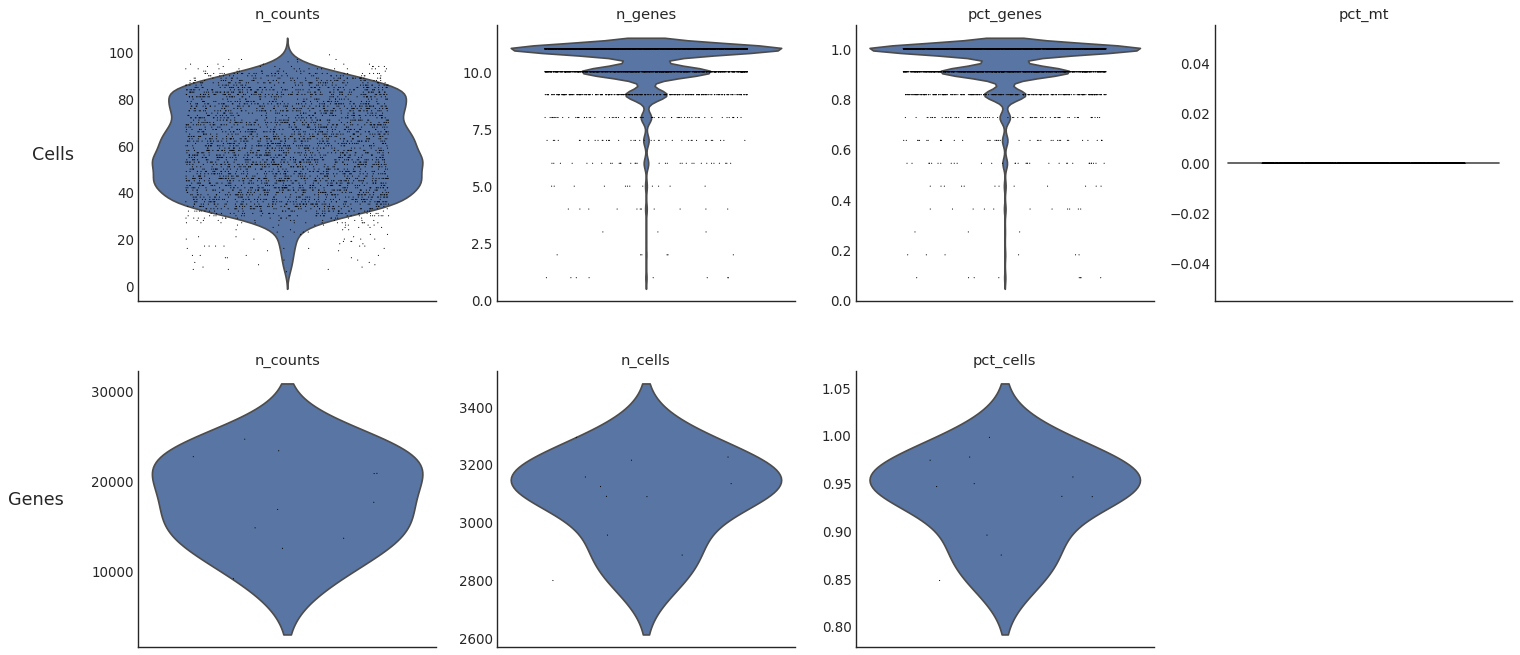

In [10]:
st.plot_qc(adata,jitter=0.3,)

Commented the following code section because no cells survived the filtering.

In [11]:
st.filter_cells(adata,min_n_features= 11)
st.filter_features(adata,min_n_cells = 500)

filter cells based on min_n_features
after filtering out low-quality cells: 
1917 cells, 11 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
1917 cells, 11 genes


#### Feature selection

Please check if the blue curve fits the points well. If not, please adjust the parameter **'loess_frac'** (usually by lowering it) until the blue curve fits well. 

9 variable genes are selected


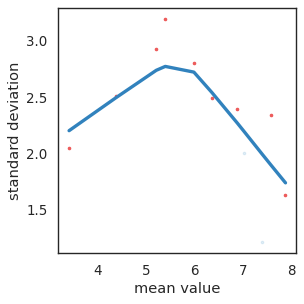

In [12]:
st.select_variable_genes(adata,loess_frac=0.9,percentile=15)

**Alternatively, user can also select top  principal components using all genes or variable genes:**
- use all genes   
`st.select_top_principal_components(adata,n_pc=15,first_pc=True)`
- use variable genes   
    - users need to first run `st.select_variable_genes(adata,loess_frac=0.01, n_genes=2000)`  
    - `st.select_top_principal_components(adata,feature='var_genes',n_pc=40,first_pc=True)`

#### Dimension reduction

In [13]:
st.dimension_reduction(adata,method='se',feature='var_genes',n_components=2,n_neighbors=15,n_jobs=4)

feature var_genes is being used ...
4 cpus are being used ...


> **Alternatively, using top principal components as features:**
`st.dimension_reduction(adata,method='se',feature='top_pcs',n_neighbors=15, n_components=2)`

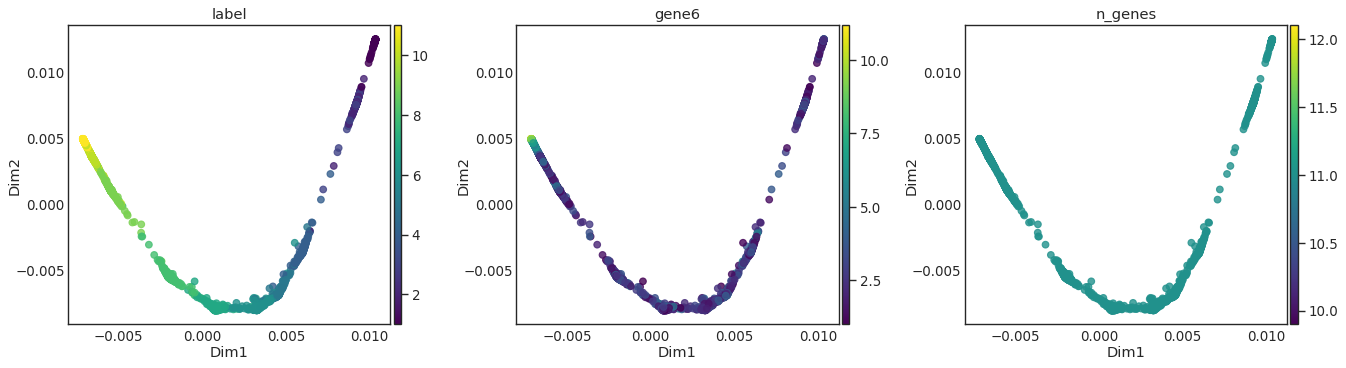

In [14]:
st.plot_dimension_reduction(adata,color=['label','gene6','n_genes'],
                            n_components=2,show_graph=False,show_text=False)

#### Trajectory inference

In [15]:
st.seed_elastic_principal_graph(adata,n_clusters=10)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 1


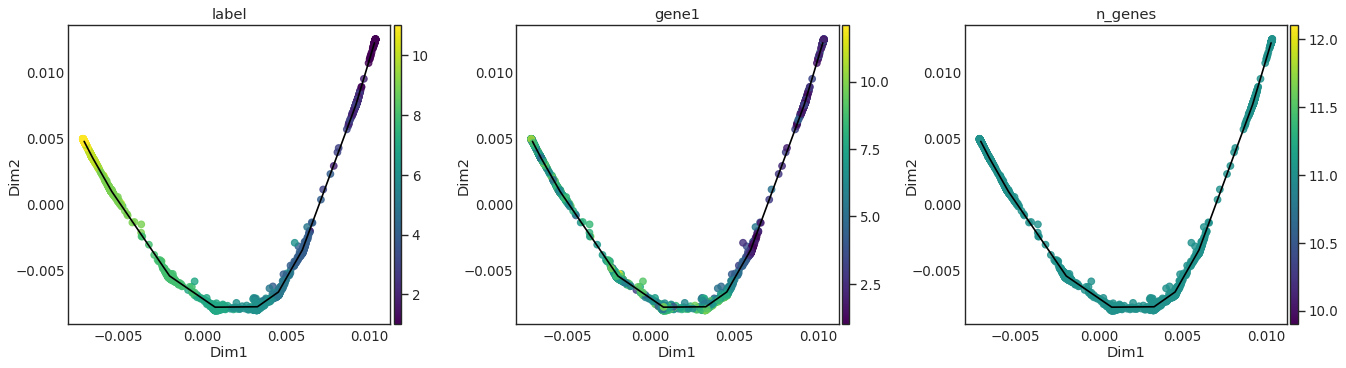

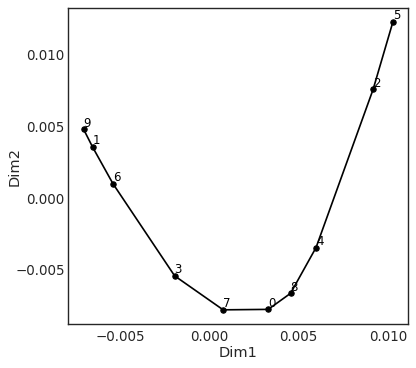

In [16]:
st.plot_dimension_reduction(adata,color=['label','gene1','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

**`epg_alpha`, `epg_mu`, `epg_lambda` are the three most influential parameters for learning elastic principal graph.**  
- `epg_alpha`: penalizes spurious branching events. **The larger, the fewer branches the function will learn**. (by default, `epg_alpha=0.02`)
- `epg_mu`: penalizes the deviation from harmonic embedding, where harmonicity assumes that each node is the mean of its neighbor nodes. **The larger, the more edges the function will use to fit into points(cells)** (by default, `epg_mu=0.1`) 
- `epg_lambda`: penalizes the total length of edges. **The larger, the 'shorter' curves the function will use to fit into points(cells)** and the fewer points(cells) the curves will reach. (by default, `epg_lambda=0.02`)

> **'epg_trimmingradius'** can help get rid of noisy points (by defalut `epg_trimmingradius=Inf`)   
e.g. `st.elastic_principal_graph(adata,epg_trimmingradius=0.1)`  

In [17]:
st.elastic_principal_graph(adata,epg_alpha=0.1,epg_mu=0.05,epg_lambda=0.05)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 1917 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

0||50
	
1.624e-06
	
50
	
49
	
48
	
0
	
0
	
0
	
1.461e-07
	
1.163e-07
	
0.998
	
0.9984
	
1.451e-06
	
2.684e-08
	
1.342e-06
	
6.711e-05
	
0


12.871 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 1


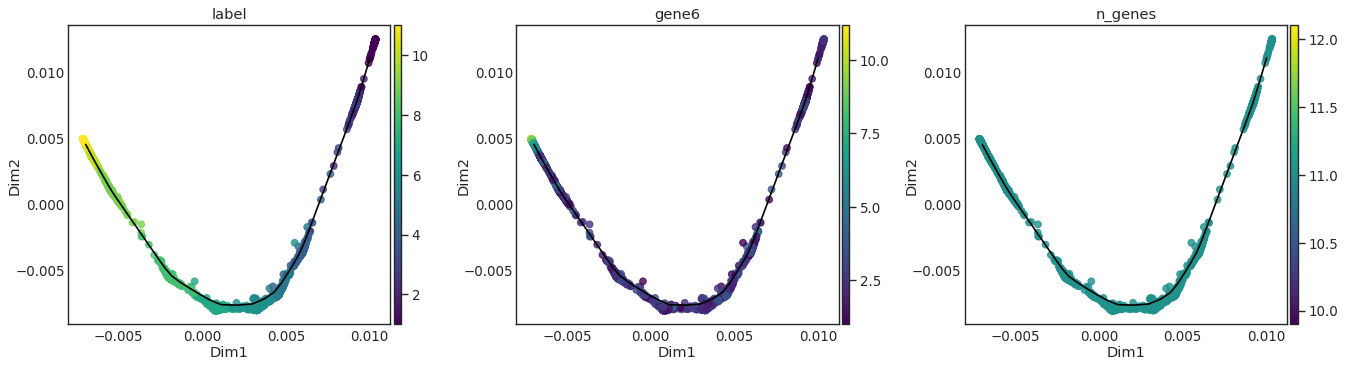

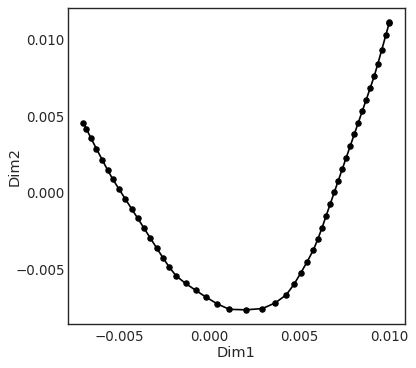

In [18]:
st.plot_dimension_reduction(adata,color=['label','gene6','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)

#### Adjusting trajectories (optional)

* Finetune branching event:  
```python
st.optimize_branching(adata,incr_n_nodes=30)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```
* Prune trivial branches:  
```python
st.prune_elastic_principal_graph(adata,epg_collapse_mode='EdgesNumber',epg_collapse_par=2)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```

* Shift branching node:  
```python
st.shift_branching(adata,epg_shift_mode='NodeDensity',epg_shift_radius=0.1,epg_shift_max=3)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```

Extending leaves with additional nodes ...
Number of branches after extending leaves: 1


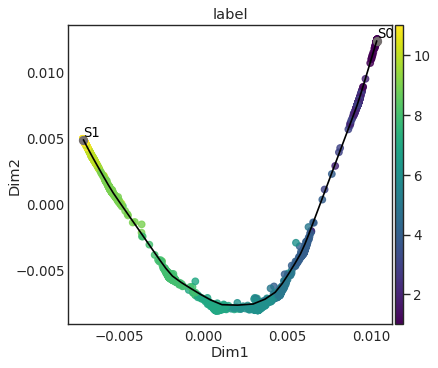

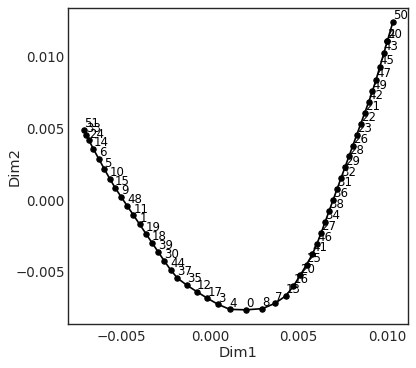

In [19]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_dimension_reduction(adata,color=['label'],n_components=2,show_graph=True,show_text=True)
st.plot_branches(adata,show_text=True)

#### Trajectory visualization

##### flat tree

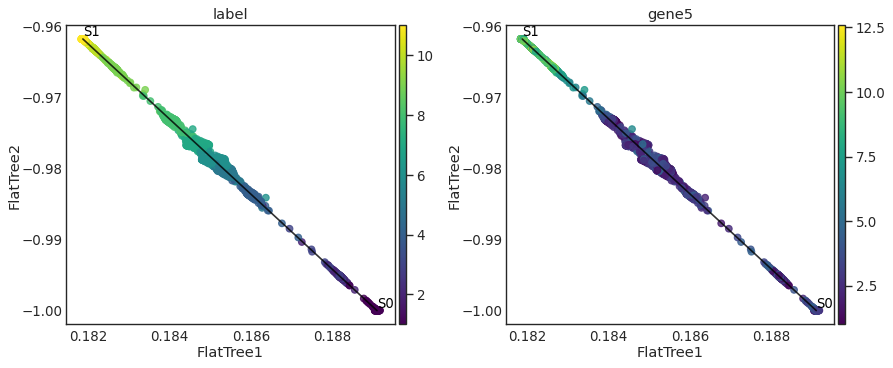

In [20]:
st.plot_flat_tree(adata,color=['label', 'gene5'],#, 'S0_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

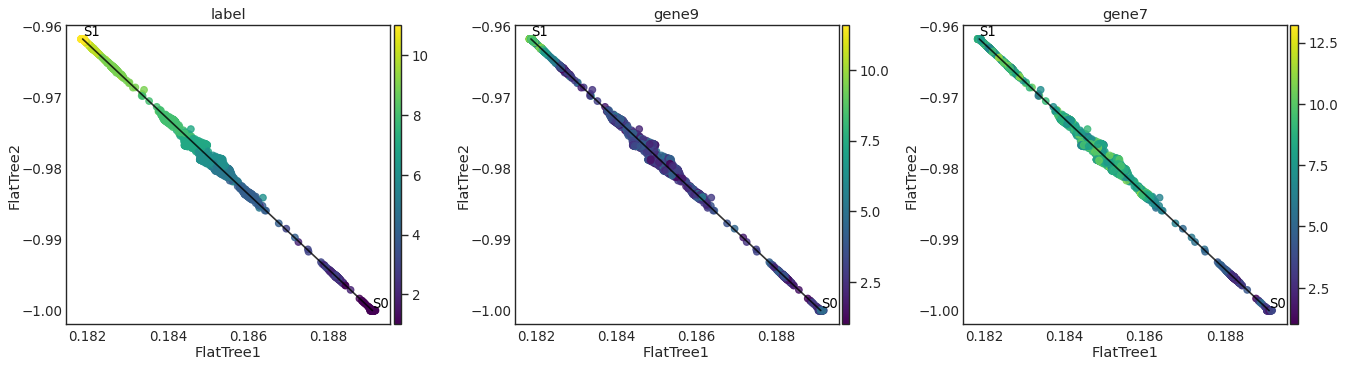

In [21]:
st.plot_flat_tree(adata,color=['label', 'gene9','gene7'],
                  dist_scale=0.5,show_graph=True,show_text=True)

##### stream plot at single cell level

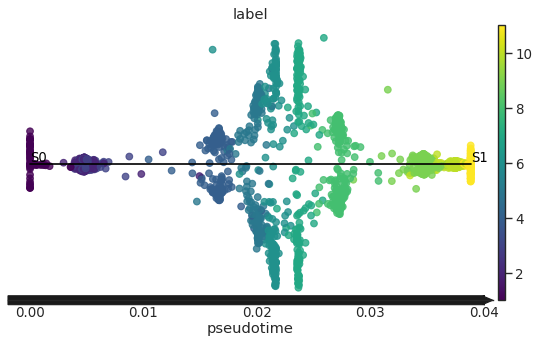

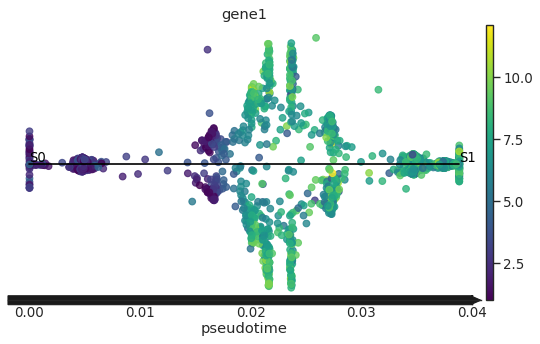

In [22]:
st.plot_stream_sc(adata,root='S0',color=['label','gene1'],
                  dist_scale=0.3,show_graph=True,show_text=True)

##### stream plots

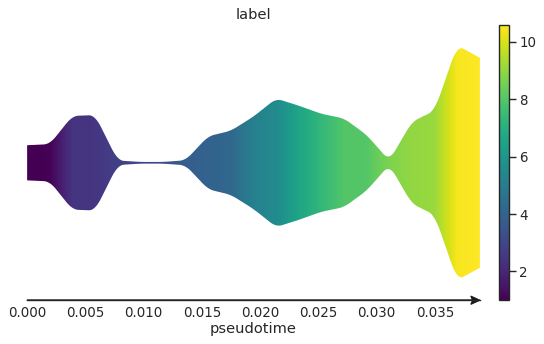

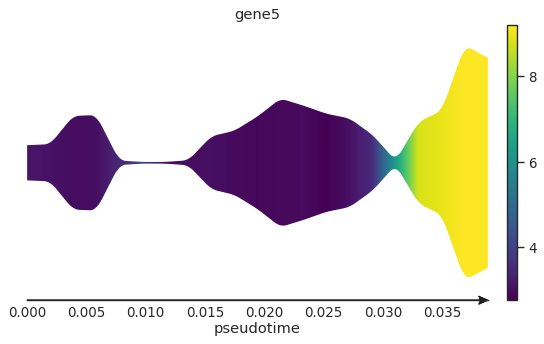

In [23]:
st.plot_stream(adata,root='S0',color=['label','gene5'])

**Some useful parameters to finetune the appearance of stream plots:**
* `dist_scale`: controls the width of STREAM plot branches.
* `factor_num_win`: controls the resolution of STREAM plot.
* `preference`: controls the order of branches
* `log_scale`: shows stream plot in log scale to zoom in on thin branches